In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

# Principle Component Analysis (PCA)

PCA is an algorithm that can be used to reduce the dimensions of a dataset.

That can have two different possibilities.

1. better visualization
2. reducing datasize, and therefor reducing trainingtime

## Implementiation of the pca algorithm

In [4]:
class MyPCAeig:

    def __init__(self,n_components):
        self.n_components = n_components
        
    def fit(self, X):
        
        # Normalisierung der Features
        X_norm = X - X.mean(axis=0)
        
        # Normalisierung der Features und Featurescaling
        #X_norm = X - X.mean(axis=0) / X.std(axis=0)
        
        self.mean_ = X.mean(axis=0)
        
        # Berechnene der Covarianz Matrix
        (n, m) = X_norm.shape
        cova = (X_norm.T.dot(X_norm)) / n
        
        # Eigenwerte und Eigenvektoren berechnen
        eig_vecs, eig_vals, vh = np.linalg.svd(cova)
        
        self.components_ = eig_vecs.T[:self.n_components]
        self.explained_variance_ = eig_vals[:self.n_components]
        self.total_variance=np.sum(eig_vals)
        self.explained_variance_ratio_ = self.explained_variance_ / self.total_variance
        
    def transform(self,X):
        return (X.dot(self.components_.T))
    
    def fit_transform(self, X):
        self.fit(X)
        return (X.dot(self.components_.T))

## Test the algorithm with test data

To test the implementation of pca we create a randome testset.

(200, 2)


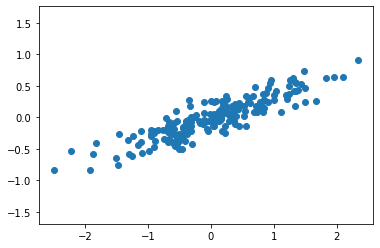

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

print(X.shape)

In [6]:
myPCAeig = MyPCAeig(2)
myPCAeig.fit(X)

print("explained variance:")
print(myPCAeig.explained_variance_)
print("Ration of explained variance / total variance:")
print(myPCAeig.explained_variance_ratio_)

explained variance:
[0.75871884 0.01838551]
Ration of explained variance / total variance:
[0.97634101 0.02365899]


In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

0.7587188433781986
[-0.94446029 -0.32862557]
0.018385506035994793
[-0.32862557  0.94446029]


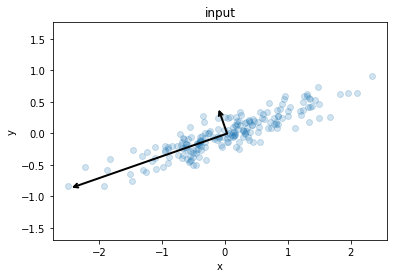

In [8]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')
for length, vector in zip(myPCAeig.explained_variance_, myPCAeig.components_):
    print(length)
    print(vector)
    v = vector*3  * np.sqrt(length)
    draw_vector(myPCAeig.mean_, myPCAeig.mean_ + v)
plt.axis('equal');

2
[0.75871884 0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
(200, 2)


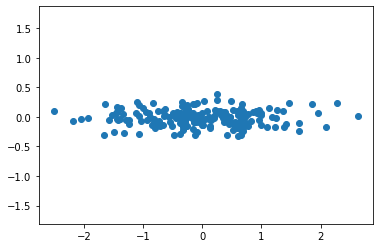

In [9]:
abbildung = myPCAeig.transform(X)
print(myPCAeig.n_components)
print(myPCAeig.explained_variance_)
print(myPCAeig.components_)

plt.scatter(abbildung[:,0], abbildung[:,1])
plt.axis('equal');
print(abbildung.shape)

After the transformation we can see that the data is rotated horizontaly to the x-axis.

## Test PCA on real data

Let's see if our algorithm get's the expected results on the iris-dataset of sklearn.

This dataset has four dimensions. We want to get a better visualization in two dimensions.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

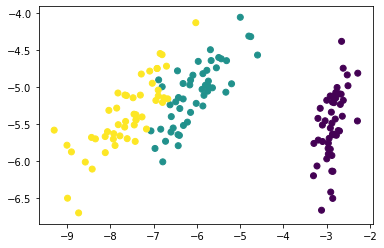

In [11]:
from sklearn.decomposition import PCA

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print(iris.DESCR)

X = iris.data
y = iris.target

print(X.shape)

my_pca = MyPCAeig(2)

my_components = my_pca.fit_transform(X)
print(my_pca.explained_variance_)
print(my_pca.explained_variance_ratio_)
print(my_pca.components_)

plt.scatter(my_components[:,0], my_components[:,1], c=y)

Let's compare our implementation to the sklearn implementation of pca.

[4.22824171 0.24267075]
[0.92461872 0.05306648]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


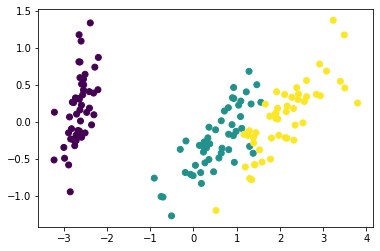

In [13]:
pca = PCA(2)

components = pca.fit_transform(X)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.components_)

plt.scatter(components[:,0], components[:,1], c=y)

In comparison to the sklearn implementation of pca we can see that the sklearn implementation looks very similar, except the datapoints are rotated about 180°.

That is caused by the difference in the implementation of the method to find the eigenvektors and eigenvalues.
The sklearn pca find the same vektors but in the opposite orientation.

## Memory reduction

For the reduction of the data you can reduce the dimensions so that you have a variance of 99% left.